#  Importing Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import Weather_functions as fp

#  Load Dataset

In [3]:
path = 'dataset'
path_imgs = list(glob.glob(path+'/**/*.jpg'))



In [4]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs))
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,dataset\sandstorm\2935.jpg,sandstorm
1,dataset\fogsmog\4552.jpg,fogsmog
2,dataset\hail\0586.jpg,hail
3,dataset\snow\0838.jpg,snow
4,dataset\sandstorm\3494.jpg,sandstorm


In [5]:
data.shape

(6862, 2)

#  EDA & Visualization

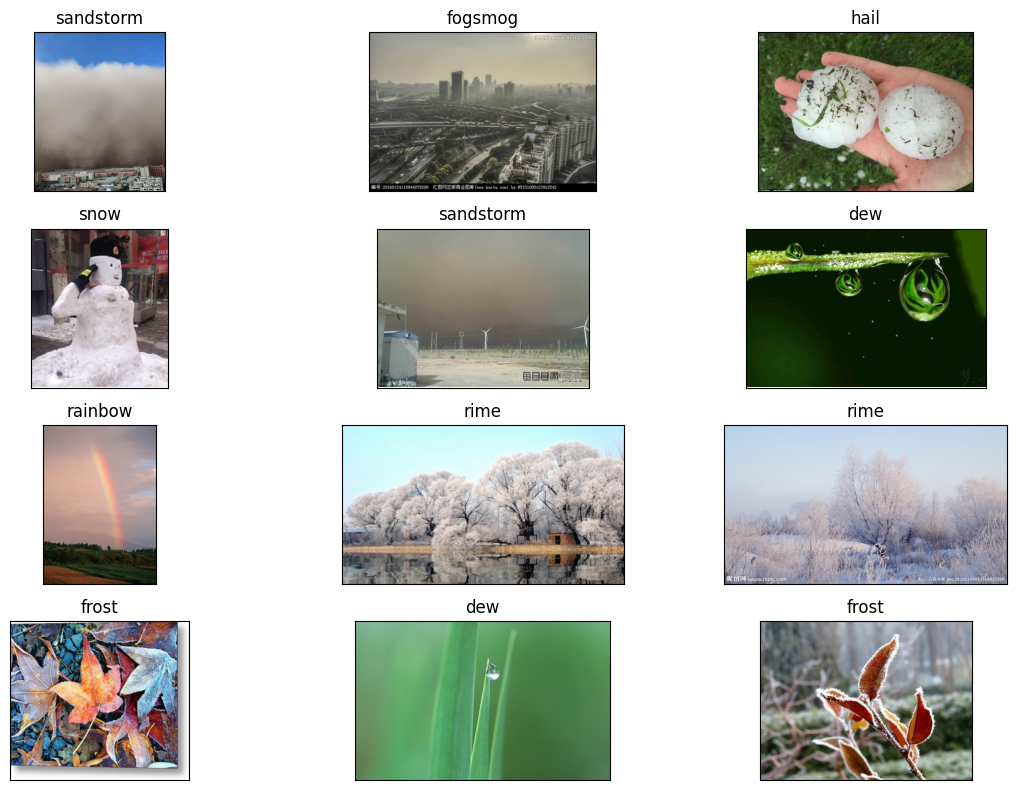

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.File_Path[i]))
    ax.set_title(data.Labels[i])
plt.tight_layout()
plt.show()

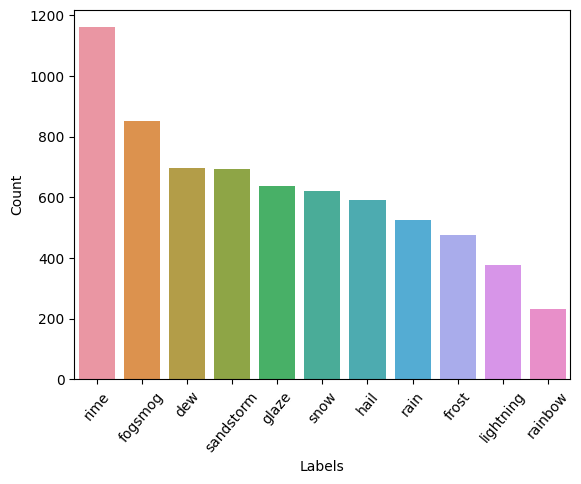

In [7]:
counts = data.Labels.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=50);

# Train & Test Split

In [8]:
train_it, test_it = train_test_split(data, test_size=0.2, random_state=2)
testLabels=test_it.Labels
testFilePath=test_it.File_Path

#  Training models

# 1] ResNet50

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/10
69/69 [==============================] - 486s 7s/step - loss: 1.9722 - accuracy: 0.3593 - val_loss: 1.4899 - val_accuracy: 0.5925
Epoch 2/10
69/69 [==============================] - 459s 7s/step - loss: 1.2056 - accuracy: 0.6646 - val_loss: 0.9374 - val_accuracy: 0.7511
Epoch 3/10
69/69 [==============================] - 467s 7s/step - loss: 0.7906 - accuracy: 0.7832 - val_loss: 0.6738 - val_accuracy: 0.8113
Epoch 4/10
69/69 [==============================] - 458s 7s/step - loss: 0.5923 - accuracy: 0.8336 - val_loss: 0.5454 - val_accuracy: 0.8478
Epoch 5/10
69/69 [==============================] - 467s 7s/step - loss: 0.4845 - accuracy: 0.8554 - val_loss: 0.4779 - val_accuracy: 0.8487
Epoch 6/10
69/69 [==============================] - 457s 7s/step - loss: 0.4156 - accuracy: 0.8732 - val_loss

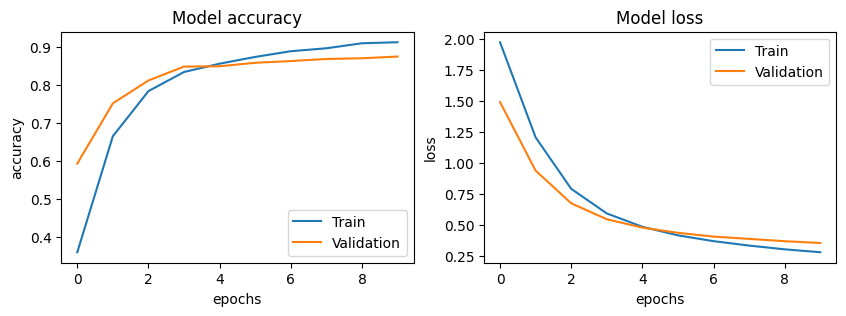

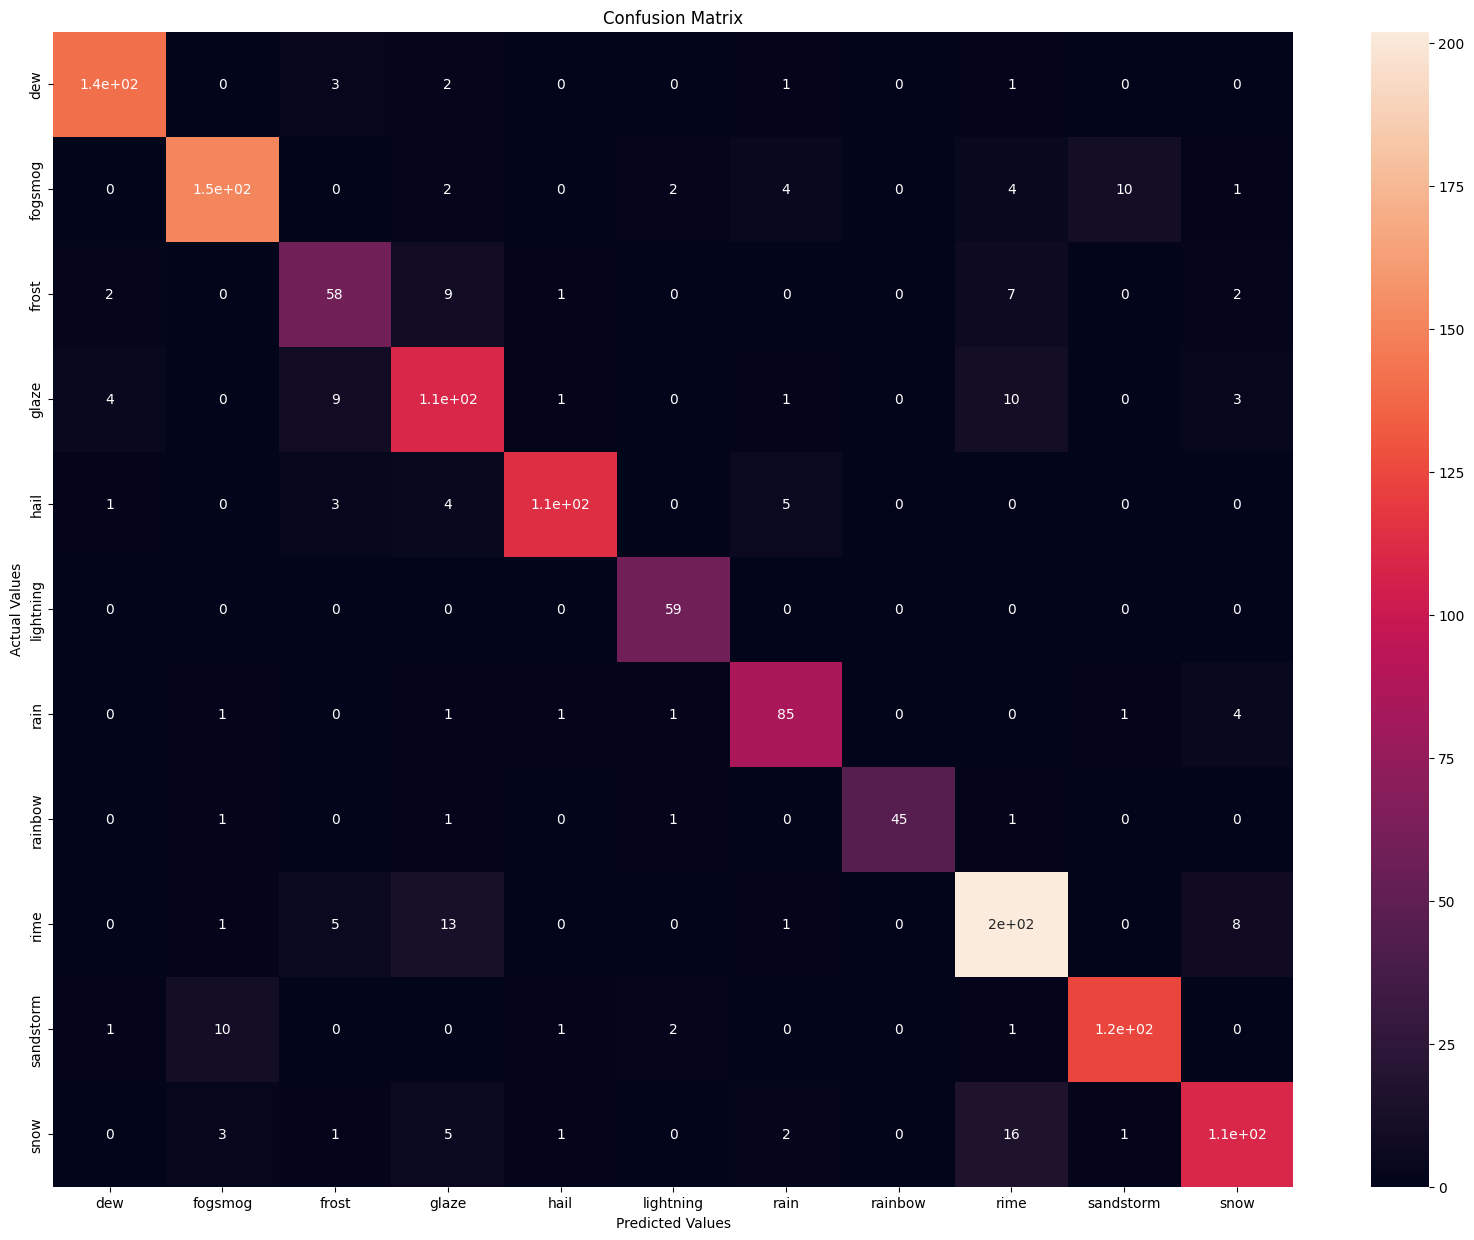

              precision    recall  f1-score   support

         dew       0.95      0.95      0.95       148
     fogsmog       0.90      0.87      0.89       174
       frost       0.73      0.73      0.73        79
       glaze       0.75      0.80      0.77       137
        hail       0.96      0.90      0.93       126
   lightning       0.91      1.00      0.95        59
        rain       0.86      0.90      0.88        94
     rainbow       1.00      0.92      0.96        49
        rime       0.83      0.88      0.86       230
   sandstorm       0.91      0.89      0.90       139
        snow       0.86      0.79      0.82       138

    accuracy                           0.87      1373
   macro avg       0.88      0.88      0.88      1373
weighted avg       0.87      0.87      0.87      1373



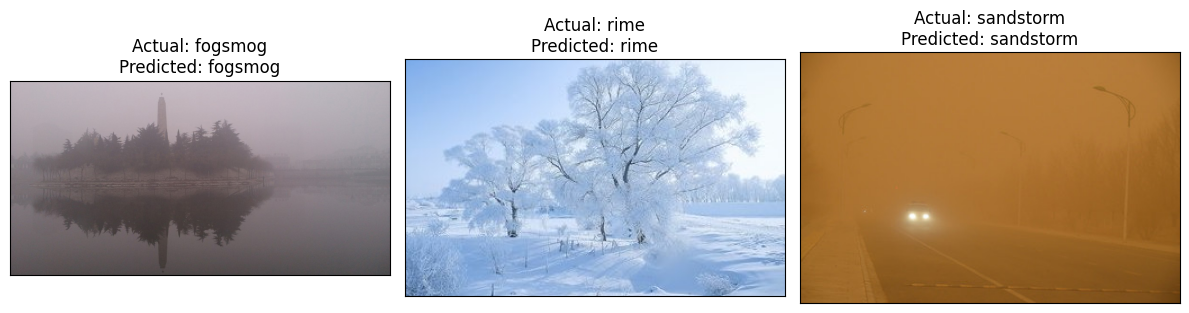

22/22 [==============================] - 114s 5s/step - loss: 0.3909 - accuracy: 0.8711
    Test Loss: 0.39089
Test Accuracy: 87.11%


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
ResNet_pre_input=preprocess_input
train_gen_ResNet, valid_gen_ResNet, test_gen_ResNet = fp.augment(ResNet_pre_input,train_it,test_it)
ResNet_model, stop_early=fp.run_model(ResNet50)
history = ResNet_model.fit(
    train_gen_ResNet,
    validation_data=valid_gen_ResNet,
    epochs=10,
    callbacks=stop_early
)
history_ResNet= fp.ploting(history,test_gen_ResNet,train_gen_ResNet, ResNet_model,testLabels,testFilePath)

result_ResNet = fp.result_test(test_gen_ResNet,ResNet_model)

In [10]:
ResNet_model.save('C://Users/MrBot/Documents/Weather-Image-Classification-using-Deep-Learning/Interfaces/model_ResNet_1.h5')

# 2] MobileNet

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/10
69/69 [==============================] - 120s 2s/step - loss: 2.2786 - accuracy: 0.1769 - val_loss: 1.9945 - val_accuracy: 0.3300
Epoch 2/10
69/69 [==============================] - 116s 2s/step - loss: 1.7450 - accuracy: 0.4743 - val_loss: 1.4962 - val_accuracy: 0.5962
Epoch 3/10
69/69 [==============================] - 118s 2s/step - loss: 1.2824 - accuracy: 0.6471 - val_loss: 1.0987 - val_accuracy: 0.7010
Epoch 4/10
69/69 [==============================] - 117s 2s/step - loss: 0.9660 - accuracy: 0.7313 - val_loss: 0.8584 - val_accuracy: 0.7630
Epoch 5/10
69/69 [==============================] - 118s 2s/step - loss: 0.7773 - accuracy: 0.7796 - val_loss: 0.7203 - val_accuracy: 0.7958
Epoch 6/10
69/69 [==============================] - 122s 2s/step - loss: 0.6597 - accuracy: 0.8081 - val_loss

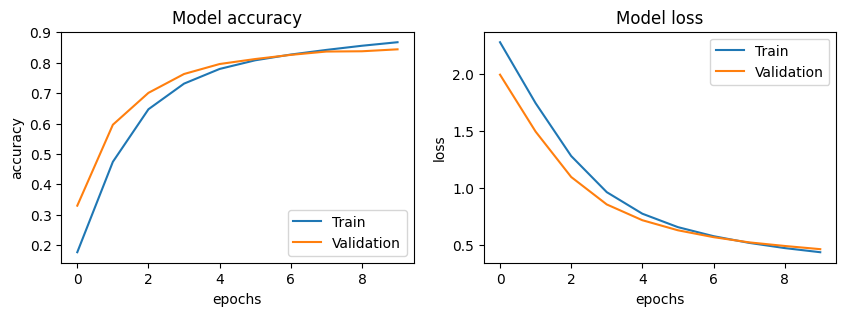

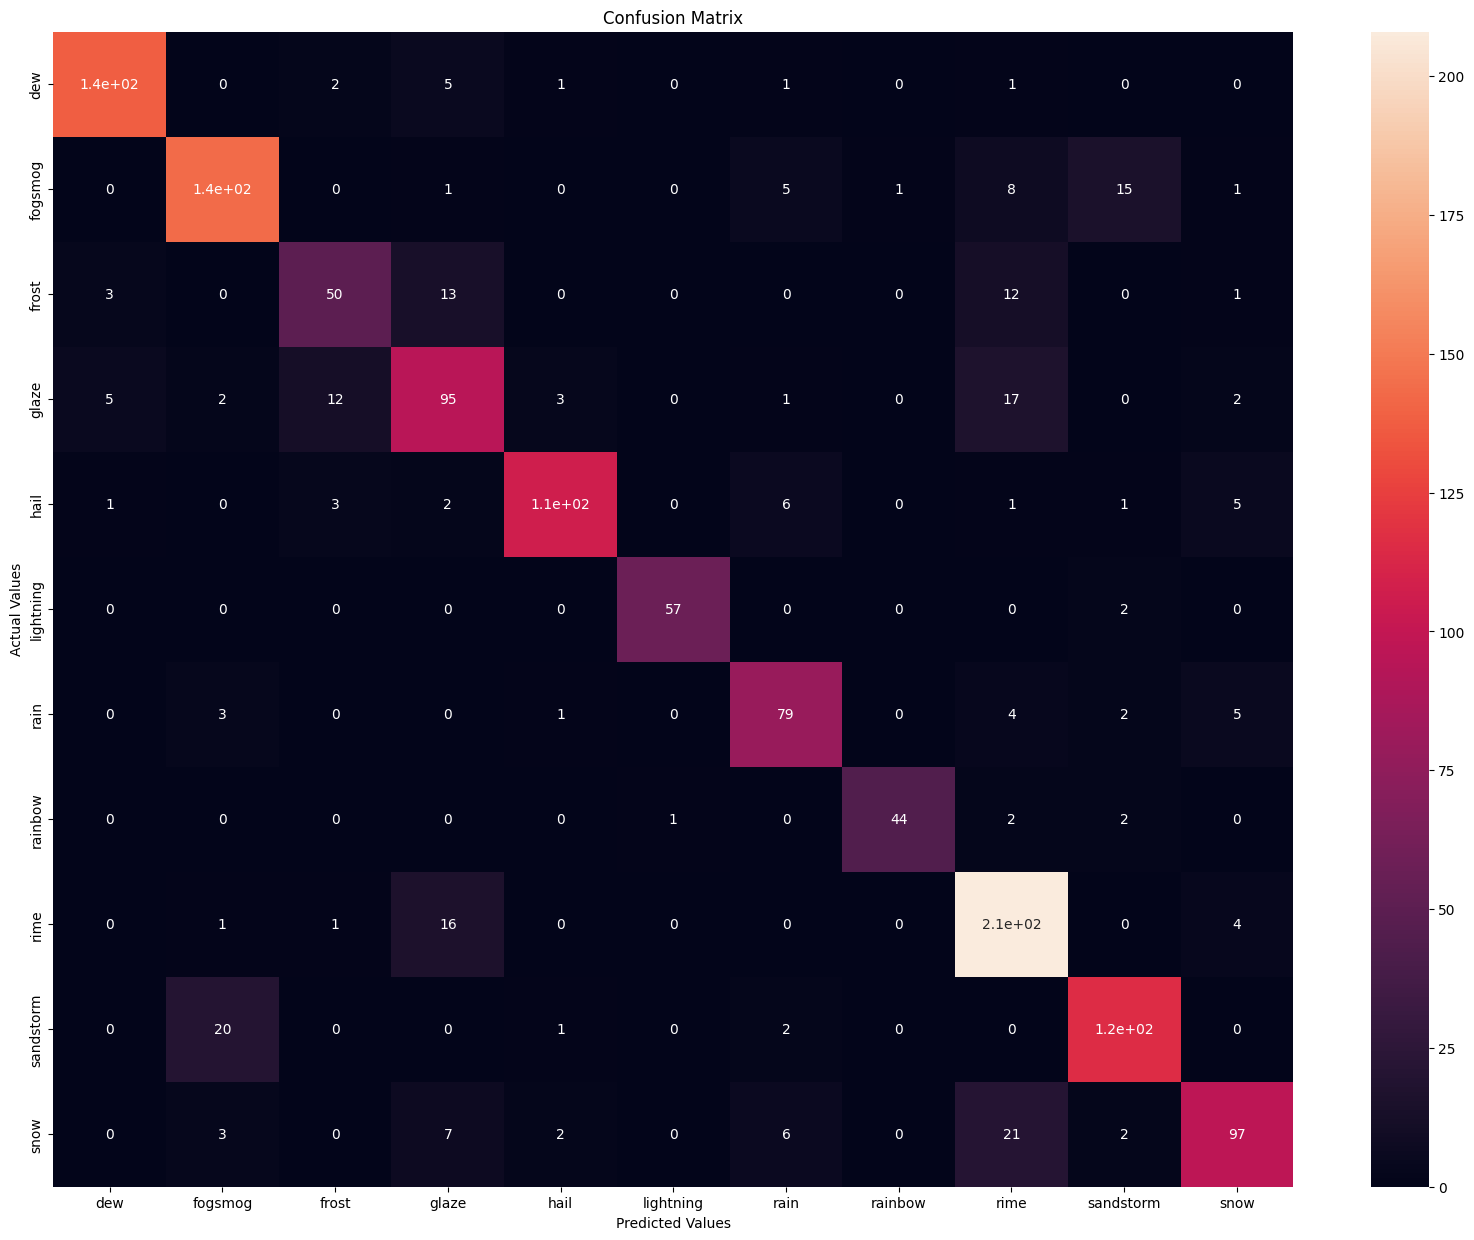

              precision    recall  f1-score   support

         dew       0.94      0.93      0.94       148
     fogsmog       0.83      0.82      0.83       174
       frost       0.74      0.63      0.68        79
       glaze       0.68      0.69      0.69       137
        hail       0.93      0.85      0.89       126
   lightning       0.98      0.97      0.97        59
        rain       0.79      0.84      0.81        94
     rainbow       0.98      0.90      0.94        49
        rime       0.76      0.90      0.83       230
   sandstorm       0.83      0.83      0.83       139
        snow       0.84      0.70      0.77       138

    accuracy                           0.83      1373
   macro avg       0.85      0.83      0.83      1373
weighted avg       0.83      0.83      0.83      1373



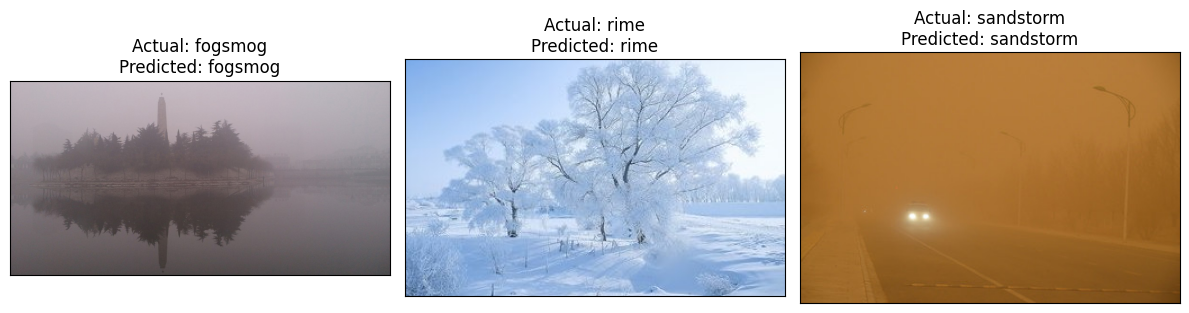

22/22 [==============================] - 29s 1s/step - loss: 0.5387 - accuracy: 0.8259
    Test Loss: 0.53867
Test Accuracy: 82.59%


In [11]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
MobileNet_pre_input=preprocess_input
train_gen_MobileNet, valid_gen_MobileNet, test_gen_MobileNet = fp.augment(MobileNet_pre_input,train_it,test_it)
MobileNet_model, stop_early=fp.run_model(MobileNet)
history = MobileNet_model.fit(
    train_gen_MobileNet,
    validation_data=valid_gen_MobileNet,
    epochs=10,
    callbacks=stop_early,
    verbose=1
)
history_MobileNet = fp.ploting(history,test_gen_MobileNet,train_gen_MobileNet, MobileNet_model,testLabels,testFilePath)

result_MobileNet = fp.result_test(test_gen_MobileNet,MobileNet_model)

In [12]:
MobileNet_model.save('C://Users/MrBot/Documents/Weather-Image-Classification-using-Deep-Learning/Interfaces/model_MobileNet_1.h5')

# 3] VGG16

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg_pre_input=preprocess_input
train_gen_VGG, valid_gen_VGG, test_gen_VGG = fp.augment(vgg_pre_input,train_it,test_it)
model_VGG16, stop_early=fp.run_model(VGG16)
history = model_VGG16.fit(
    train_gen_VGG,
    validation_data=valid_gen_VGG,
    epochs=10,
    callbacks=stop_early,
    verbose=1
)


Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/10
69/69 [==============================] - 1297s 19s/step - loss: 3.4613 - accuracy: 0.1086 - val_loss: 2.6889 - val_accuracy: 0.1595
Epoch 2/10
69/69 [==============================] - 1299s 19s/step - loss: 2.3671 - accuracy: 0.2338 - val_loss: 2.0561 - val_accuracy: 0.3236
Epoch 3/10
69/69 [==============================] - 1286s 19s/step - loss: 1.8651 - accuracy: 0.3871 - val_loss: 1.6757 - val_accuracy: 0.4576
Epoch 4/10
69/69 [==============================] - 1294s 19s/step - loss: 1.5416 - accuracy: 0.5007 - val_loss: 1.4203 - val_accuracy: 0.5615
Epoch 5/10
69/69 [==============================] - 1291s 19s/step - loss: 1.3132 - accuracy: 0.5786 - val_loss: 1.2394 - val_accuracy: 0.6208
Epoch 6/10
69/69 [==============================] - 1315s 19s/step - loss: 1.1471 - accuracy: 0.640

In [14]:
model_VGG16.save('C://Users/MrBot/Documents/Weather-Image-Classification-using-Deep-Learning/Interfaces/model_VGG16_1.h5')

22/22 [==============================] - 326s 15s/step


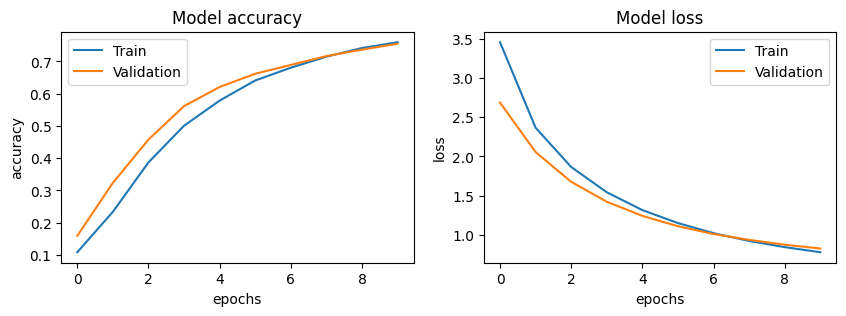

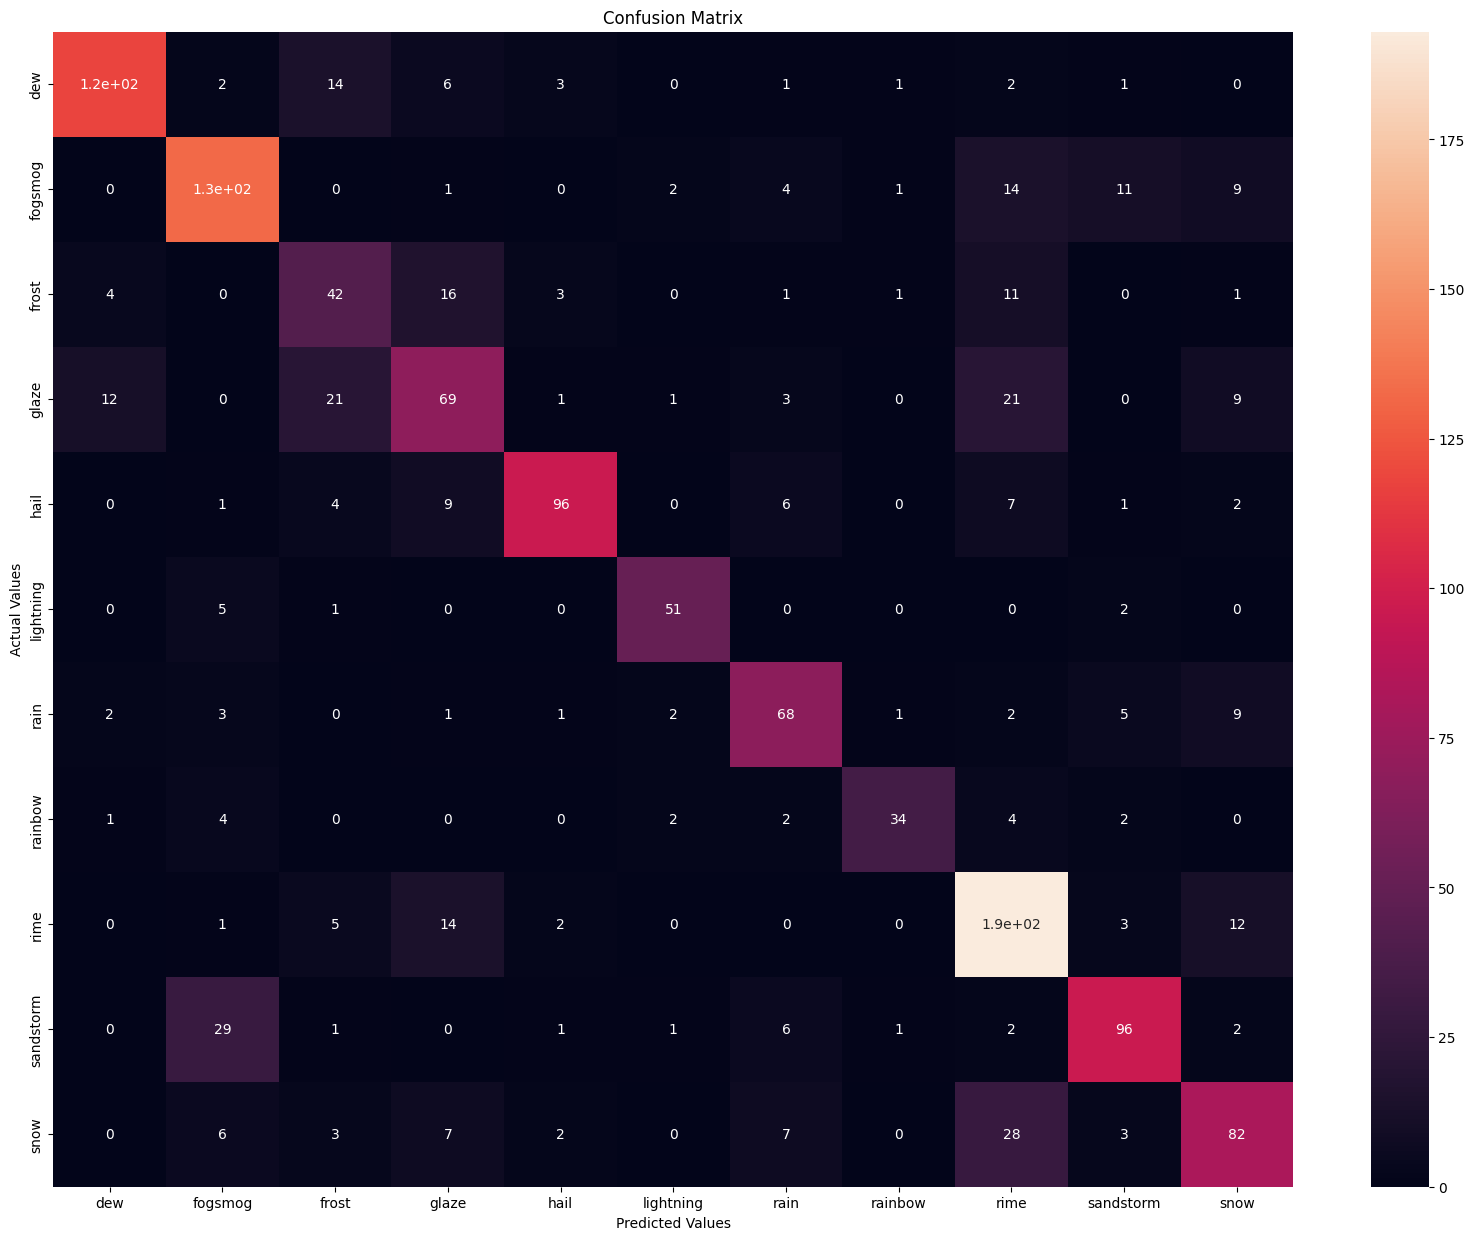

              precision    recall  f1-score   support

         dew       0.86      0.80      0.83       148
     fogsmog       0.72      0.76      0.74       174
       frost       0.46      0.53      0.49        79
       glaze       0.56      0.50      0.53       137
        hail       0.88      0.76      0.82       126
   lightning       0.86      0.86      0.86        59
        rain       0.69      0.72      0.71        94
     rainbow       0.87      0.69      0.77        49
        rime       0.68      0.84      0.75       230
   sandstorm       0.77      0.69      0.73       139
        snow       0.65      0.59      0.62       138

    accuracy                           0.71      1373
   macro avg       0.73      0.71      0.71      1373
weighted avg       0.72      0.71      0.71      1373



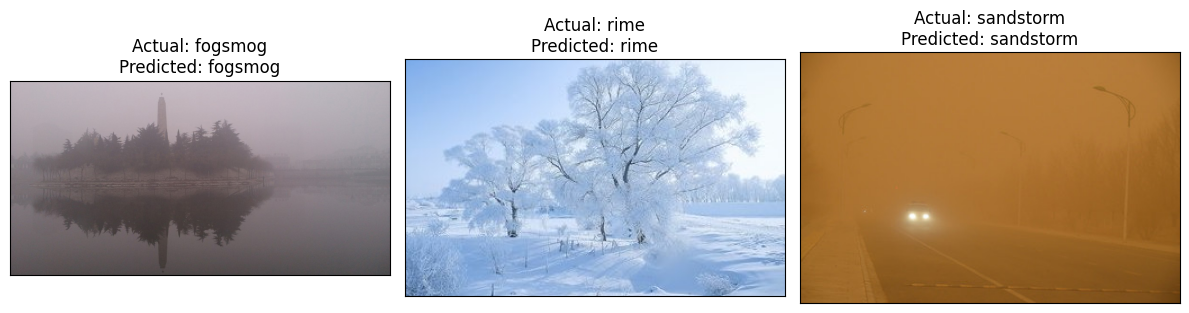

22/22 [==============================] - 318s 14s/step - loss: 0.9156 - accuracy: 0.7145
    Test Loss: 0.91559
Test Accuracy: 71.45%


In [15]:
history_VGG =fp.ploting(history,test_gen_VGG,train_gen_VGG, model_VGG16,testLabels,testFilePath)
result_VGG16 = fp.result_test(test_gen_VGG,model_VGG16)

# 4] DenseNet201

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.
Epoch 1/10
69/69 [==============================] - 694s 10s/step - loss: 2.1546 - accuracy: 0.2823 - val_loss: 1.8621 - val_accuracy: 0.4512
Epoch 2/10
69/69 [==============================] - 685s 10s/step - loss: 1.5849 - accuracy: 0.5426 - val_loss: 1.3109 - val_accuracy: 0.6572
Epoch 3/10
69/69 [==============================] - 687s 10s/step - loss: 1.1131 - accuracy: 0.6997 - val_loss: 0.9249 - val_accuracy: 0.7648
Epoch 4/10
69/69 [==============================] - 675s 10s/step - loss: 0.8321 - accuracy: 0.7776 - val_loss: 0.7262 - val_accuracy: 0.8122
Epoch 5/10
69/69 [==============================] - 684s 10s/step - loss: 0.6804 - accuracy: 0.8101 - val_loss: 0.6159 - val_accuracy: 0.8368
Epoch 6/10
69/69 [==============================] - 685s 10s/step - loss: 0.5860 - accuracy: 0.8340 - va

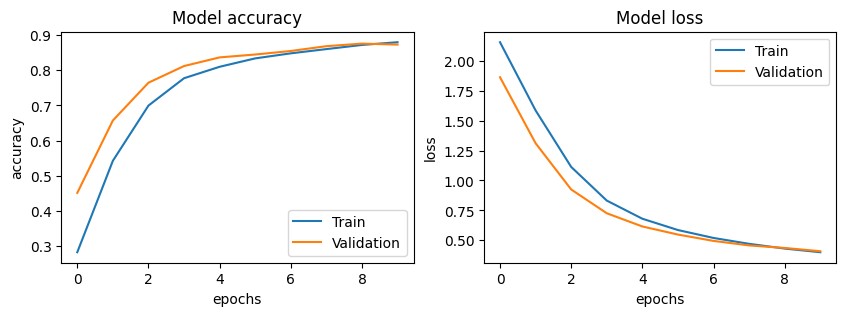

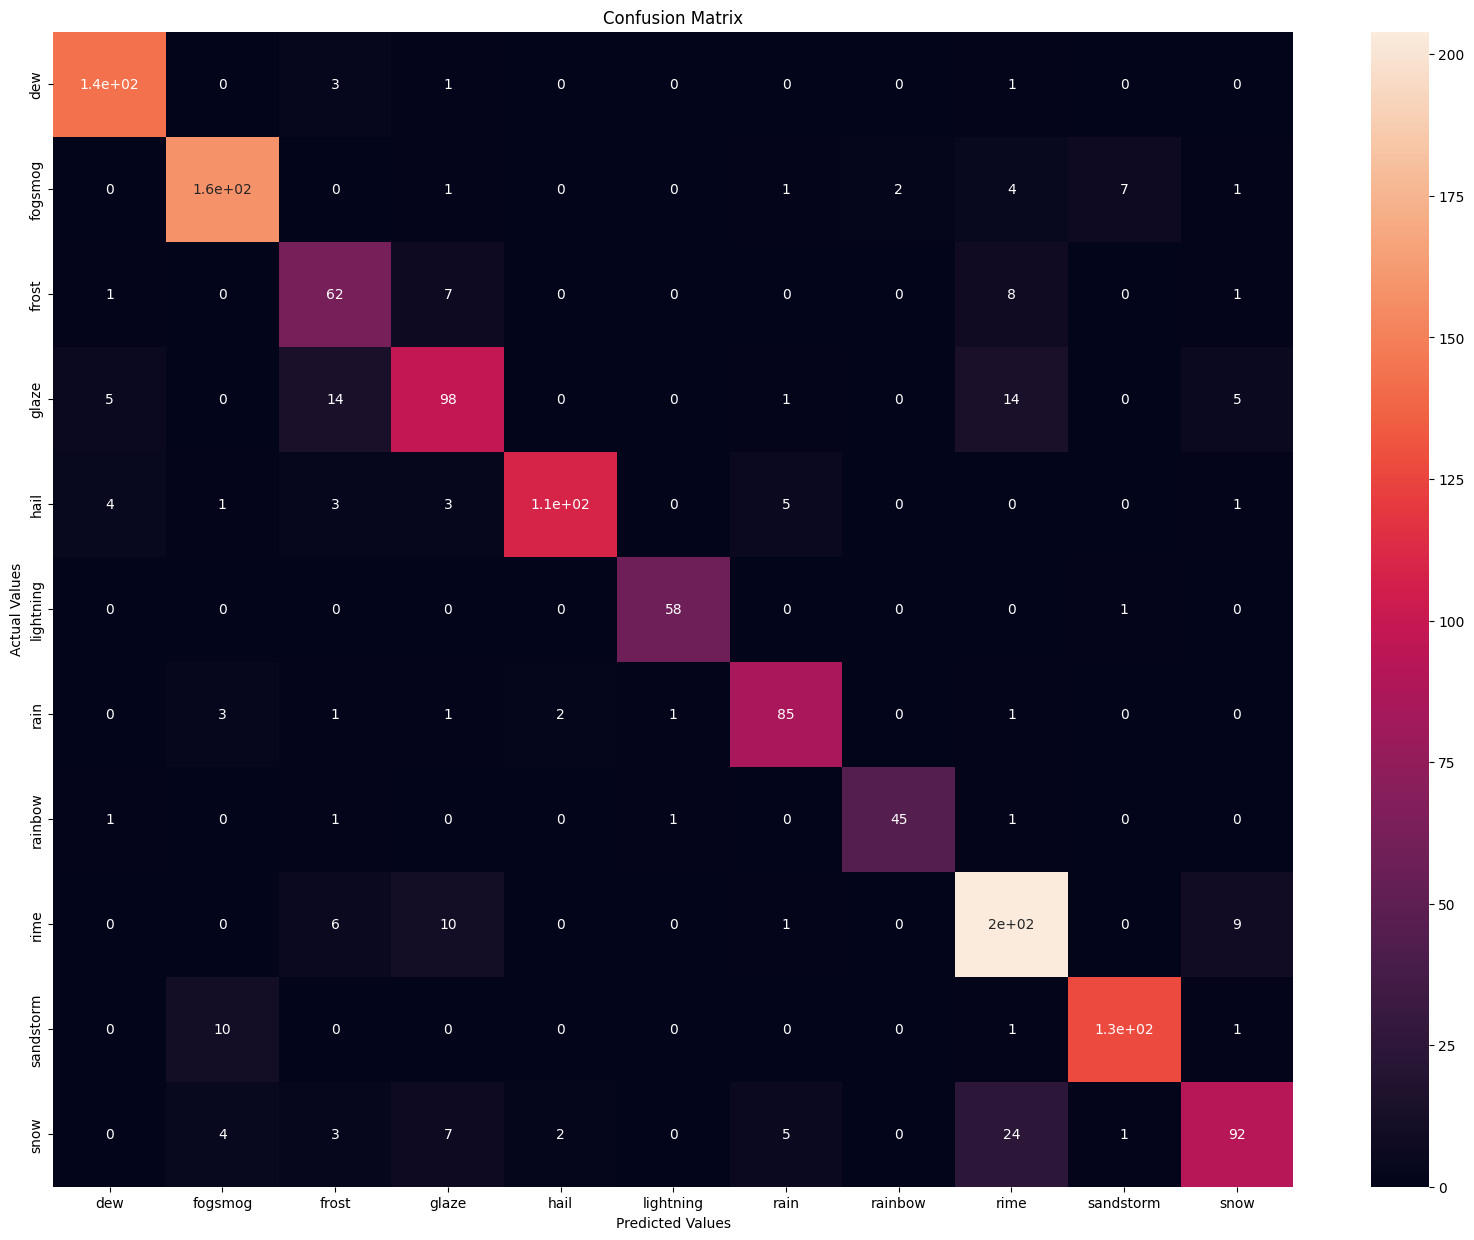

              precision    recall  f1-score   support

         dew       0.93      0.97      0.95       148
     fogsmog       0.90      0.91      0.90       174
       frost       0.67      0.78      0.72        79
       glaze       0.77      0.72      0.74       137
        hail       0.96      0.87      0.91       126
   lightning       0.97      0.98      0.97        59
        rain       0.87      0.90      0.89        94
     rainbow       0.96      0.92      0.94        49
        rime       0.79      0.89      0.84       230
   sandstorm       0.93      0.91      0.92       139
        snow       0.84      0.67      0.74       138

    accuracy                           0.86      1373
   macro avg       0.87      0.86      0.87      1373
weighted avg       0.86      0.86      0.86      1373



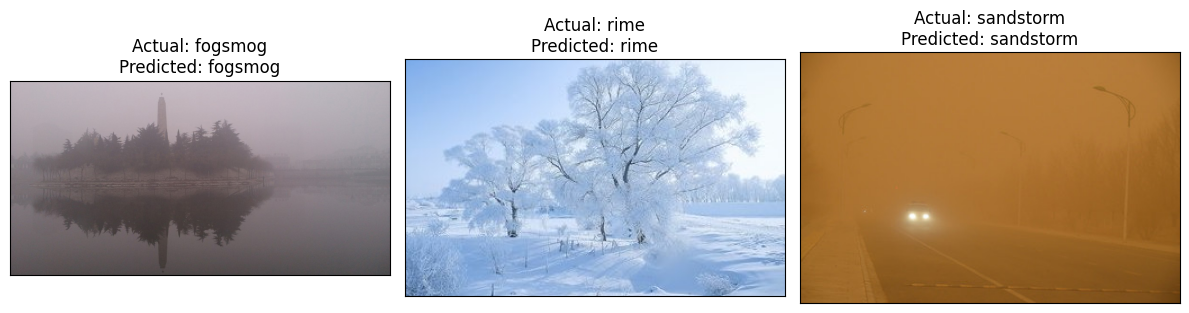

22/22 [==============================] - 168s 8s/step - loss: 0.4644 - accuracy: 0.8602
    Test Loss: 0.46443
Test Accuracy: 86.02%


In [16]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input

DenseNet201_pre_input=preprocess_input
train_gen_DenseNet201, valid_gen_DenseNet201, test_gen_DenseNet201 = fp.augment(DenseNet201_pre_input,train_it,test_it)
model_DenseNet201, stop_early=fp.run_model(DenseNet201)
history = model_DenseNet201.fit(
    train_gen_DenseNet201,
    validation_data=valid_gen_DenseNet201,
    epochs=10,
    callbacks=stop_early,
    verbose=1
)
history=fp.ploting(history,test_gen_DenseNet201,train_gen_DenseNet201, model_DenseNet201,testLabels,testFilePath)
result_DenseNet201 = fp.result_test(test_gen_DenseNet201,model_DenseNet201)

In [17]:
model_DenseNet201.save('C://Users/MrBot/Documents/Weather-Image-Classification-using-Deep-Learning/Interfaces/model_DenseNet201.h5')

#  Model Comparison

# Compairison Based on Loss

In [18]:
output = pd.DataFrame({'Model':['MobileNet','ResNet50','VGG16','DenseNet201'],
                      'loss':[result_MobileNet[0],result_ResNet[0],result_VGG16[0],
                                 result_DenseNet201[0]]})

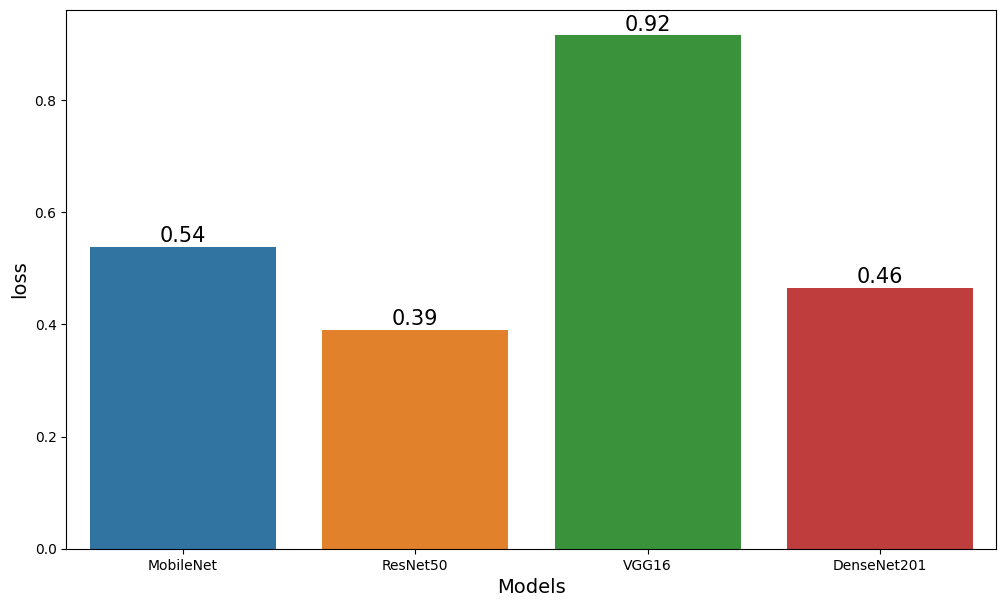

In [19]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='loss', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.ylabel("loss", size=14)
plt.show()

# Compairison Based on Accuraccy

In [20]:
output = pd.DataFrame({'Model':['MobileNet','ResNet50','VGG16','DenseNet201'],
                      'Accuracy':[result_MobileNet[1],result_ResNet[1],result_VGG16[1],
                                 result_DenseNet201[1]]})

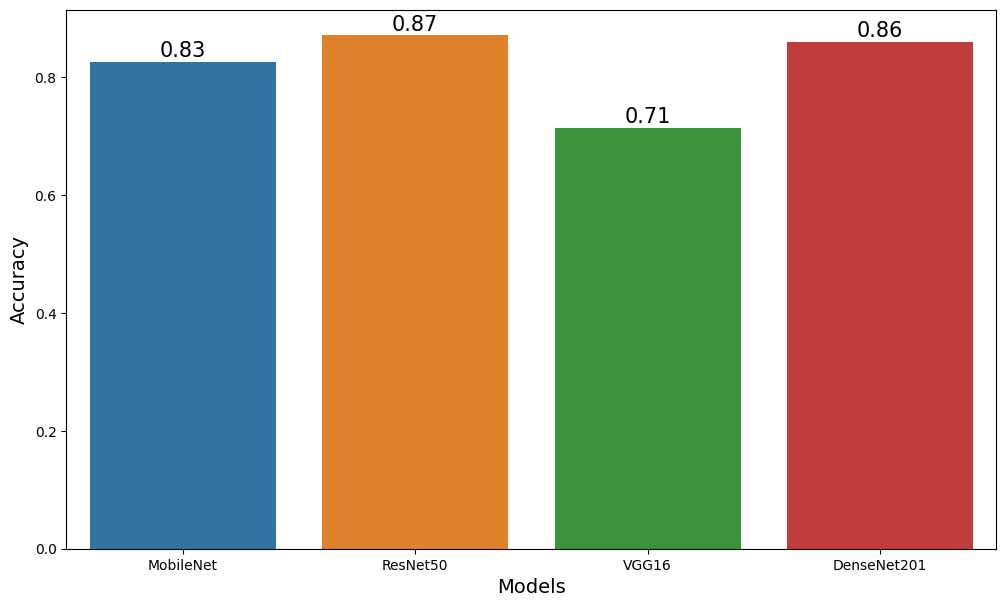

In [21]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.show()